# Time Series Agent langgraph

In [ ]:
#! pip3 install pygraphviz
# on github now

In [ ]:
# BUSINESS SCIENCE UNIVERSITY
# PYTHON FOR GENERATIVE AI COURSE
# AI TIME SERIES FORECASTING AGENT

# ***

# GOAL: Demonstrate the steps in making a forecast with machine learning

import pandas as pd
import streamlit as st
import pandas as pd
import numpy as np
import os
import yaml


# STEP 1: Get some data

# Create a sample dataset
def create_sample_datal():
    # Import necessary libraries


    # Set random seed for reproducibility
    np.random.seed(123)

    # Generate dates from January 2018 to December 2020
    date_range = pd.date_range(start='2018-01-01', end='2020-12-01', freq='MS')

    # Number of items (3 items)
    num_items = 3

    # Create a list of item IDs
    item_ids = [f'item_{i+1}' for i in range(num_items)]


    with open('./credentials.yml') as f:
        credentials = yaml.safe_load(f)
    os.environ["OPENAI_API_KEY"] = credentials["openai"]


    CHAT_LLM_OPTIONS = [
        # "gpt-4.1-nano", # POOR RESULTS WITH COMPLEX TASKS LIKE FORECASTING
        "gpt-4.1-mini",
        "gpt-4.1",
        "gpt-40-nini",
        "gpt-40"
    ]

    # * Page Setup
    st.set_page_config(page_title="Your Al Time Series Forecasting Agent")  
    st. title("Your AI Time Series Forecasting Agent")

    # Top-level description
    with st. expander ("I'm a handy forecasting Al agent that connects to multiple SQLite databases. You can ask me questions about the SQL database, " \
    "perform aggregations, and make forecasts. I will report the results. (see example questions)"):
        # Replace nested expanders with tabs
        tab1, tab2 = st. tabs( ["Walmart Database Questions", "Bike Shop Database Questions"])

        with tab1:
            st.markdown(
                """
                **Walmart Database Questions:**
                """
            )







ModuleNotFoundError: No module named 'streamlit'

In [6]:
#! pip3 install langchain langgraph langchain-openai langchain-community

In [20]:
#!pip3 install --upgrade pip

In [165]:

# PYTHON FOR GENERATIVE AI COURSE
# MAKING A TIME SEIRES FORECASTING AGENT WITH LANGCHAIN ANDLANGGRAPH
# ***

# LIBRARIES


from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser, BaseOutputParser
from langgraph.graph import END, StateGraph
from typing import TypedDict

import os
import yaml
import pandas as pd
import re 
from pprint import pprint
from IPython.display import Markdown, display, Image

# AI LLM SETUP

with open('./credentials.yml') as f:
        credentials = yaml.safe_load(f)
os.environ["OPENAI_API_KEY"] = credentials["openia"]["api_key"]
print("OpenAI API Key set successfully.")
#print(os.environ["OPENAI_API_KEY"])

llm = ChatOpenAI(
    model="gpt-4.1-mini",  # Use a smaller model for faster response times
    #temperature=0.2,  # Lower temperature for more deterministic responses
    #max_tokens=1000,  # Limit the response length
    #streaming=True,  # Enable streaming for real-time responses
)

# Test the LLM with a simple prompt
def test_llm(prompt="What is the capital of France?"):
    response = llm.invoke(prompt)
    #print(response.content)
    if response:
        #print("LLM is working correctly.")
        #Markdown(f"**LLM Response:** {response.content}")
        display(Markdown(f"**LLM Response:** {response.content}"))
    else:
        print("LLM is not responding as expected.")

#test_llm("Hello, can you tell me about the weather today?")


# DATA
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("yasserh/walmart-dataset")

#print("Path to dataset files:", path)
df = pd.read_csv("Walmart.csv")
df = df.rename(columns={"Store": "item_id", "Weekly_Sales": "value", "Date": "date"})
df = df.drop(columns=["Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"])
print(df.head())


# using LangChain to create a time series forecasting agent

# 1. Forcasr Preprocessor -> Bouncer
# 2. Forcast Generator -> Python Function
# 3. Forcast Exceution -> Runs the Python Function

forecast_preprocessor_prompt = PromptTemplate(
     template = """
     You are a expert in routing decisios for a Tim Series Forecasting Expert Agent. Your Job is to:
        1. Determine what the correct format for a User Question should be for use with a Forcast Generator Agent.

    Use the following criteria on how to route the initial user question to the correct Forcast Generator Agent:

       From the incoming user question, return only the important part of the incoming user question that is relevant 
       for the Forecast Generator agent. This will be the 'formatted user_question_forecast_only'. If 'None' is found, 
       return the original user question.

    Return JSON with 'formatted _user_question_forecast_only'•

    USER_QUESTION: {question}

""",
    input_variables=["question"],
)

forecast_preprocessor = forecast_preprocessor_prompt | llm | JsonOutputParser()


result = forecast_preprocessor.invoke({"question": "Aggregate the sales for each food item by day. For each food item, what is the forecast for the next 365 days?"})

result['formatted_user_question_forecast_only']

# Forcast Agent

prompt_forecast_generator = PromptTemplate(
        template="""
        You are a forecasting expert. Given an input question and data provided as a dictionary from a SQL agent, your job is to write python code to perform a forecast using the data as an
        input and determining a forecast horizon and which items to forecast.

        Return Python code in ''python " format.

        # IMPORTANT NOTES:

        1. Return a single function named, "forecast_ts" that ingests a parameter containing "data", and outputs one data frame (the forecast_df)
        2. Do NOT rewrite data inside the generated python code.
        3. Make sure to convert colums containing date information to Pandas datetine
        4. If no ID column, make an id column for use with the forecast. Just use "1" for the ID.

        # KEY DECISIONS FROM THE PROVIDED QUESTION:

        - Which item should be forecast. If none is provided, assume that all items should be forecast (use a loop to do this)
        - How far into the future should the forecast be made? If no forecast horizon is provided, determine a reasonable forecast 
        horizon based on the data provided and its periodicity (example: if monthly data, forecast next 12 months (a years worth))
        - If more than one ID column included in the data, consolidate into a single "id_column"

        # USEFUL TIME SERIES FORECASTING FUNCTIONS:
        # - Attempt to use these functions. Make modified versions as necessary based on the input data.

        # MAKE SURE ALL OF THESE ARE WRAPPED INSIDE OF THE forecast_ts() function to make the scope local:

        def forecast_ts(data):
            # Wrap imports inside function to make scope local:
            import numpy as np 
            import pandas as pd
            from xgboost import XGBRegressor
            from sklearn.model_selection import train_test_split
        
            # Convert input dictionary to DataFrame
            df = pd.DataFrame(data)

            # Define columns:
            id_col = 
            date_col = 
            value_col =
            
            # Determine forecast horizon:
            forecast_horizon =

            # Get unique item IDs
            unique_items = df[id_col].unique()
            
            # Wrap functions to enforce local scope for exes() command:
            def extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h=60):
                "Extends a single time series by h periods."
                _filtered_df = data[data[id_col] = id_value].copy()
                _filtered_df[date_col] = pd.to_datetime(_filtered_df[date_col])
                _filtered_df = _filtered_df.set_index(date_col)

                timeseries = _filtered_df.index
                new_timeseries = pd.date_rangel(start=timeseries[-1] + pd.Timedelta(days=1),periods=h)

                _ids = np.repeat(id_value, h)
                _vals = np.repeat (np.nan, h)
                new_df = pd.DataFrame(dict([(id_col,_ids), (value_col,_vals)]), index=new_timeseries).assign(key="FUTURE")
                old_df = pd.DataFrame(dict([(id_col,_filtered_df[id_col]),(value_col,_filtered_df[value_col])]).set_index(_filtered_df.index).assign(key="ACTUAL")
                ret_df = pd.concat([old_df, new_df], axis=0)
                return ret_df

            def extend_all_ timeseries_frame(data, id_col, date_col, value_col, h=60):
                "Extends all time series in the data by h periods."
                unique_ ids = dataliy_col].unique()
                _list_of_dfs = lextend_single_timeseries_frame (data, id_col, date_col, value_col, id_value, h) for id_value in unique_ids]
                ret_df = pd.concat(_list_of_dfs, axis=0)
                return ret_df

            # Change these features as necessary based on the timeseries period (daily)
            def make_timeseries_features(data):
                "Makes time series features from a dataframe with a datetime index."
                datal'_index.num' ] = data. index.astype(np.int64) // 10**9
                data['_year'] = data.index.year
                data['_month'] = data.index.month
                data['_day'] = data.index.day
                data['_wday'] = data.index.dayofweek
                return data

            def forecast_single_timeseries(data, id_col, date_col, value_col, id_value, h=60, **kwargs):
                "Forecasts a single timeseries using XGBoost."
                single_tineseries_extended_df = extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h)
                single_tineseries_feat_df = make_timeseries_features(single_timeseries_extended_df)

                future_df = single_timeseries_feat_df.query("key = "FUTURE")
                actual_df = single_timeseries_feat_df.query ("key == "ACTUAL")

                df = actual_df.drop([id_col, 'key'], axis=1)
                X = df.drop(value_col, axis=1)
                y = df[value_col]

                # Calculate Conformal Prediction intervals
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=h, random_state=42, shuffle=False)

                model = XGBRegressor(**kwargs)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                std_dev = np.std(abs(y_test - y_pred))

                # Refit to full dataset
                X_ train = actual_df.drop( [id_col, 'key', value_coll, axis=1)
                y_train = actual_df[value_col)

                model.fit(X_train, y_train)

                # Predict on future data
                future_df [value_col] = model.predict (future_df.drop([id_col, 'key'], axis=1))
                future_df ['conf_lo'] = future_df[value_col] - 1.96 * std_dev
                future_df ['conf_hi'] = future_df[value_col] + 1.96 * std_dev

                combined_df = pd. concat ( [actual_df, future_df], axis=0)
                return combined_df



            # Initialize list for forecasted DataFrames
            forecast_dfs = []

            # Loop over each unique item and make forecasts
            for item in unique_items:
                forecast_df = forecast_single_timeseries(data=df, id_col=id_col, date_col=date_col, value_col=value_col, id_value=item, h=forecast_horizon)
                forecast_dfs.append(forecast_df)
            
            * Combine all forecasts into a single DataFrame
            combined_forecast_df = pd.concat(forecast_dfs,ignore_index=False)

            # Remove the engineered features
            combined_forecast_df = combined_forecast_df.drop(columns=[col for col in combined_forecast_df.columns if col.startswith('_')])

            # Reset index to make it easier to work with
            combined_forecast_df = combined_forecast_df.reset_index((names=[date_col])

            return (combined_forecast_df)


        # Combine all forecasts into a single DataFrame
        combined_ forecast_df = pd. concat(forecast_dfs, ignore_index=False)

        # Remove the engineered features
        combined_forecast_df = combined_forecast_df.drop(columns=[col for col in combined_forecast_df.columns if col.startswith('_')])

        # Reset index to make it easier to work with
        combined_forecast_df = combined_forecast_df.reset_index(names=[date_col])


        # ERRORS TO AVOID:

        Try to prevent these errors:

            ValueError: If using all scalar vatues, you must pass and index

            KeyErrors - This as typically because the columns are no elected properly from the incoming data. Ensure there is a single id_col, date_col, and value_col in the data.

            NameError: name 'extend_single_timeseries_frame' is not defined - This happens when one of the functions was not included

            AttributeError: 'dict' object has no attribute 'unique' - This happens when the a dictionary wasnt converted to a pandas DataFrame


        # RETURN

            Return the combined forecast DataFrame as a JSON object with the key 'forecast_df'.Return Python Forecasting Code wrapped in ' python "'.

        # INPUTS:


        - Data Sample (from SQL Generator): {data}
        - User's Forecast Question: {question}    

        """,
        input_variables=["question", "data"],
)

class PythonOutputParser(BaseOutputParser):
    def parse(self, text: str):
        def extract_python_code(text):
            python_code_match = re.search(r'```python(.*?)```', text, re.DOTALL)
            if python_code_match:
                python_code = python_code_match.group(1).strip()
                return python_code
            else:
                python_code_match = re.search(r"python(.*?)'", text, re.DOTALL)
                if python_code_match:
                    python_code = python_code_match.group(1).strip()
                    return python_code
                else:
                    return None
        python_code = extract_python_code(text)
        if python_code:
            return python_code
        else:
            return text
          
forecast_generator = (prompt_forecast_generator | llm | PythonOutputParser())
# Test the forecast generator with a sample question and data
result_2 = forecast_generator.invoke({"question": 'What is the forecast for each food item for the next 365 days?', 
                                      "data": df.head(1000).to_dict()})

display(Markdown(f"```python \n\n{result_2} \n```"))


OpenAI API Key set successfully.
   item_id        date       value
0        1  05-02-2010  1643690.90
1        1  12-02-2010  1641957.44
2        1  19-02-2010  1611968.17
3        1  26-02-2010  1409727.59
4        1  05-03-2010  1554806.68


```python 

def forecast_ts(data):
    import numpy as np
    import pandas as pd
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split
    
    # Convert input dictionary to DataFrame
    df = pd.DataFrame(data)
    
    # Identify columns: 
    # id_col: if multiple possible id columns, consolidate into one
    # date_col: column containing date info
    # value_col: value to forecast
    
    # Heuristics to find columns:
    # id_col: any column with more than 1 unique value except date and value columns
    # date_col: column with date-like values
    # value_col: numeric column other than id and date
    
    # Infer columns:
    # We have sample columns named 'item_id', 'date', 'value' from sample data
    # Use these names if exist, else fallback
    
    possible_id_cols = [col for col in df.columns if col.lower() not in ['date', 'value']]
    date_col = None
    value_col = None
    id_col = None
    
    # Find date_col by attempting to parse columns to datetime
    for col in df.columns:
        # Try parse first 10 non-null values to datetime
        try:
            sample_vals = df[col].dropna().iloc[:10]
            parsed = pd.to_datetime(sample_vals, errors='coerce')
            # If at least half parse successfully, it's date_col
            if parsed.notnull().sum() >= len(sample_vals)/2:
                date_col = col
                break
        except Exception:
            continue
    
    # Find value_col: numeric column not date_col
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if date_col in numeric_cols:
        numeric_cols.remove(date_col)
    if len(numeric_cols) == 1:
        value_col = numeric_cols[0]
    else:
        # fallback: look for 'value' column explicitly
        if 'value' in df.columns:
            value_col = 'value'
        else:
            # else pick the numeric column with max variance
            value_col = df[numeric_cols].var().idxmax()
    
    # Identify id_col: columns except date_col and value_col
    id_candidates = [col for col in df.columns if col not in [date_col, value_col]]
    # If multiple id candidates, consolidate into one id_col by concatenation
    if len(id_candidates) == 0:
        # no id_col, create one with constant 1
        df['id'] = 1
        id_col = 'id'
    elif len(id_candidates) == 1:
        id_col = id_candidates[0]
    else:
        # consolidate multiple id cols into a single string id
        df['id'] = df[id_candidates].astype(str).agg('_'.join, axis=1)
        id_col = 'id'
    
    # Convert date_col to datetime
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
    # Drop rows with null date or null value
    df = df.dropna(subset=[date_col, value_col])
    
    # Determine periodicity of data to set forecast horizon
    # User requested 365 days forecast horizon explicitly, so use that.
    forecast_horizon = 365
    
    # Get unique item IDs
    unique_items = df[id_col].unique()
    
    def extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h=60):
        "Extends a single time series by h periods (daily)."
        _filtered_df = data[data[id_col] == id_value].copy()
        _filtered_df[date_col] = pd.to_datetime(_filtered_df[date_col])
        _filtered_df = _filtered_df.set_index(date_col).sort_index()

        # Create new date range starting after last observed date for h days
        last_date = _filtered_df.index.max()
        new_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=h, freq='D')

        _ids = np.repeat(id_value, h)
        _vals = np.repeat(np.nan, h)
        new_df = pd.DataFrame({id_col: _ids, value_col: _vals}, index=new_dates).assign(key="FUTURE")
        old_df = _filtered_df[[id_col, value_col]].copy()
        old_df['key'] = 'ACTUAL'

        ret_df = pd.concat([old_df, new_df], axis=0)
        return ret_df

    def extend_all_timeseries_frame(data, id_col, date_col, value_col, h=60):
        "Extends all time series in the data by h periods."
        unique_ids = data[id_col].unique()
        _list_of_dfs = [extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h) for id_value in unique_ids]
        ret_df = pd.concat(_list_of_dfs, axis=0)
        return ret_df

    def make_timeseries_features(data):
        "Makes time series features from a dataframe with a datetime index."
        data = data.copy()
        data['_timestamp'] = data.index.astype(np.int64) // 10**9
        data['_year'] = data.index.year
        data['_month'] = data.index.month
        data['_day'] = data.index.day
        data['_wday'] = data.index.dayofweek
        return data

    def forecast_single_timeseries(data, id_col, date_col, value_col, id_value, h=60, **kwargs):
        "Forecasts a single timeseries using XGBoost."
        single_ts_extended_df = extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h)
        single_ts_feat_df = make_timeseries_features(single_ts_extended_df)

        future_df = single_ts_feat_df[single_ts_feat_df['key'] == "FUTURE"].copy()
        actual_df = single_ts_feat_df[single_ts_feat_df['key'] == "ACTUAL"].copy()

        df_train = actual_df.drop([id_col, 'key'], axis=1)
        X = df_train.drop(value_col, axis=1)
        y = df_train[value_col]

        # Train/test split for evaluation and std_dev calculation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=h, random_state=42, shuffle=False)

        model = XGBRegressor(**kwargs)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        std_dev = np.std(np.abs(y_test - y_pred))

        # Refit on full actual data
        X_full = actual_df.drop([id_col, 'key', value_col], axis=1)
        y_full = actual_df[value_col]
        model.fit(X_full, y_full)

        # Predict on future data
        X_future = future_df.drop([id_col, 'key', value_col], axis=1, errors='ignore')
        future_df[value_col] = model.predict(X_future)
        future_df['conf_lo'] = future_df[value_col] - 1.96 * std_dev
        future_df['conf_hi'] = future_df[value_col] + 1.96 * std_dev

        combined_df = pd.concat([actual_df, future_df], axis=0)
        return combined_df

    # Initialize list for forecasted DataFrames
    forecast_dfs = []

    # Loop over each unique item and make forecasts with horizon 365 days
    for item in unique_items:
        forecast_df = forecast_single_timeseries(data=df, id_col=id_col, date_col=date_col, value_col=value_col, id_value=item, h=forecast_horizon)
        forecast_dfs.append(forecast_df)

    # Combine all forecasts into a single DataFrame
    combined_forecast_df = pd.concat(forecast_dfs, axis=0)

    # Remove the engineered features
    drop_cols = [col for col in combined_forecast_df.columns if col.startswith('_')]
    combined_forecast_df = combined_forecast_df.drop(columns=drop_cols)

    # Reset index to bring date_col back as a column
    combined_forecast_df = combined_forecast_df.reset_index().rename(columns={'index': date_col})

    # Reorder columns: id_col, date_col, value_col, key, conf_lo, conf_hi (if present)
    cols_order = [id_col, date_col, value_col, 'key']
    if 'conf_lo' in combined_forecast_df.columns and 'conf_hi' in combined_forecast_df.columns:
        cols_order += ['conf_lo', 'conf_hi']
    existing_cols = [col for col in cols_order if col in combined_forecast_df.columns]
    other_cols = [col for col in combined_forecast_df.columns if col not in existing_cols]
    combined_forecast_df = combined_forecast_df[existing_cols + other_cols]

    return combined_forecast_df 
```

—FORECASTER—
* PREPROCESS FOR FORECAST GENERATOR
* GENERATE FORECAST CODE
* EXECUTE FORECAST CODE


``` python
def forecast_ts(data):
    import numpy as np
    import pandas as pd
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split

    # Convert input dictionary to DataFrame
    df = pd.DataFrame(data)

    # Identify columns
    # Use columns containing 'item' or 'id' as id columns
    id_cols = [col for col in df.columns if ('item' in col.lower() or 'id' in col.lower())]
    date_cols = [col for col in df.columns if 'date' in col.lower()]
    value_cols = [col for col in df.columns if col not in id_cols + date_cols]

    # Consolidate multiple ID columns into a single id_col if needed
    if len(id_cols) == 0:
        # No ID column found, create one with constant 1
        df['id'] = 1
        id_col = 'id'
    elif len(id_cols) == 1:
        id_col = id_cols[0]
    else:
        # More than one ID column: consolidate into single string id
        df['id'] = df[id_cols].astype(str).agg('_'.join, axis=1)
        id_col = 'id'

    # Expect only one date column
    if len(date_cols) == 0:
        raise ValueError("No date column found in data")
    else:
        date_col = date_cols[0]

    # Expect only one value column
    if len(value_cols) == 0:
        raise ValueError("No value column found in data")
    else:
        value_col = value_cols[0]

    # Convert date column to datetime
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
    if df[date_col].isnull().any():
        raise ValueError("Date column conversion resulted in NaT values")

    # Sort data by id and date
    df = df.sort_values(by=[id_col, date_col]).reset_index(drop=True)

    # Determine forecast horizon (given question states 180 days)
    forecast_horizon = 180

    # Get unique item IDs
    unique_items = df[id_col].unique()

    # Helper function to find frequency offset string from date differences
    def infer_freq_str(dates):
        diffs = dates.sort_values().diff().dropna()
        if len(diffs) == 0:
            # Default daily
            return 'D'
        median_diff = diffs.median()
        # Try to infer freq string
        if np.isclose(median_diff / np.timedelta64(1, 'D'), 1):
            return 'D'
        elif np.isclose(median_diff / np.timedelta64(1, 'W'), 1):
            return 'W'
        elif np.isclose(median_diff / np.timedelta64(1, 'M'), 1):
            return 'M'
        elif np.isclose(median_diff / np.timedelta64(1, 'Y'), 1):
            return 'Y'
        else:
            # fallback daily
            return 'D'

    # Extend single timeseries frame by h periods
    def extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h=60, freq='D'):
        filtered_df = data[data[id_col] == id_value].copy()
        filtered_df[date_col] = pd.to_datetime(filtered_df[date_col])
        filtered_df = filtered_df.set_index(date_col).sort_index()

        last_date = filtered_df.index[-1]
        # Create new date range starting after last_date
        new_dates = pd.date_range(start=last_date + pd.Timedelta(1, unit=freq), periods=h, freq=freq)
        new_ids = np.repeat(id_value, h)
        new_vals = np.repeat(np.nan, h)
        new_df = pd.DataFrame({id_col: new_ids, value_col: new_vals}, index=new_dates)
        new_df['key'] = 'FUTURE'

        old_df = filtered_df[[id_col, value_col]].copy()
        old_df['key'] = 'ACTUAL'

        combined_df = pd.concat([old_df, new_df], axis=0)
        return combined_df

    # Extend all timeseries frames
    def extend_all_timeseries_frame(data, id_col, date_col, value_col, h=60, freq='D'):
        unique_ids = data[id_col].unique()
        dfs = []
        for id_value in unique_ids:
            extended_df = extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h, freq)
            dfs.append(extended_df)
        return pd.concat(dfs, axis=0)

    # Create timeseries features from datetime index
    def make_timeseries_features(data):
        # Ensure index is datetime
        idx = data.index
        data = data.copy()
        data['_timestamp'] = idx.astype(np.int64) // 10**9
        data['_year'] = idx.year
        data['_month'] = idx.month
        data['_day'] = idx.day
        data['_wday'] = idx.dayofweek
        return data

    # Forecast single timeseries using XGBoost
    def forecast_single_timeseries(data, id_col, date_col, value_col, id_value, h=60, freq='D', **kwargs):
        extended_df = extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h, freq)
        feat_df = make_timeseries_features(extended_df)

        future_df = feat_df[feat_df['key'] == 'FUTURE'].copy()
        actual_df = feat_df[feat_df['key'] == 'ACTUAL'].copy()

        train_df = actual_df.drop([id_col, 'key'], axis=1)
        X = train_df.drop(value_col, axis=1)
        y = train_df[value_col]

        # Train-test split for last h points as test
        if len(X) <= h:
            # If not enough data, just train on all
            X_train, y_train = X, y
            X_test, y_test = X, y
            use_test = False
        else:
            X_train, X_test = X[:-h], X[-h:]
            y_train, y_test = y[:-h], y[-h:]
            use_test = True

        model = XGBRegressor(**kwargs)
        model.fit(X_train, y_train)

        if use_test:
            y_pred = model.predict(X_test)
            std_dev = np.std(np.abs(y_test - y_pred))
        else:
            std_dev = y.std() * 0.1  # fallback estimate

        # Refit model on full actual data
        model.fit(X, y)

        # Predict future
        future_df[value_col] = model.predict(future_df.drop([id_col, 'key', value_col], axis=1, errors='ignore'))
        future_df['conf_lo'] = future_df[value_col] - 1.96 * std_dev
        future_df['conf_hi'] = future_df[value_col] + 1.96 * std_dev

        combined_df = pd.concat([actual_df, future_df], axis=0)
        return combined_df

    # Infer frequency string from one timeseries (choose first item)
    sample_id = unique_items[0]
    sample_dates = df.loc[df[id_col] == sample_id, date_col].sort_values()
    freq_str = infer_freq_str(sample_dates)

    # Initialize list for forecasted DataFrames
    forecast_dfs = []

    # Loop over each unique item and make forecasts with horizon 180 and inferred freq
    for item in unique_items:
        forecast_df = forecast_single_timeseries(
            data=df,
            id_col=id_col,
            date_col=date_col,
            value_col=value_col,
            id_value=item,
            h=forecast_horizon,
            freq=freq_str,
            n_estimators=100,
            random_state=42,
            verbosity=0
        )
        # Add id_col as column if lost (likely kept)
        if forecast_df.index.name != date_col:
            forecast_df.index.name = date_col
        forecast_dfs.append(forecast_df)

    # Combine all forecasts into a single DataFrame
    combined_forecast_df = pd.concat(forecast_dfs, axis=0)

    # Remove engineered features (columns starting with '_')
    cols_to_drop = [col for col in combined_forecast_df.columns if col.startswith('_')]
    combined_forecast_df = combined_forecast_df.drop(columns=cols_to_drop)

    # Reset index to have date_col as a column
    combined_forecast_df = combined_forecast_df.reset_index()

    # Return combined forecast DataFrame
    return combined_forecast_df
```

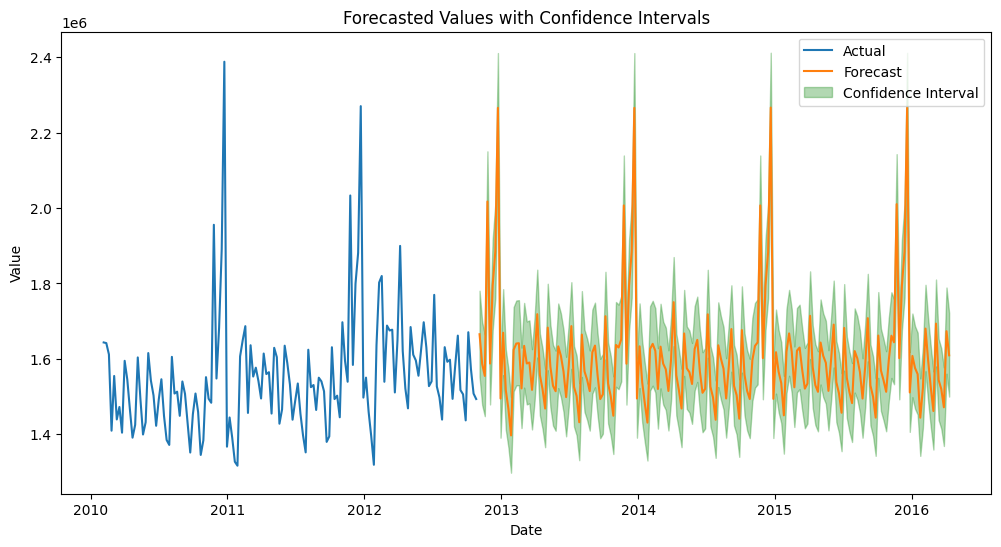

In [ ]:
# LANGGRAPH

class GraphState(TypedDict):
    """
    State for the LangGraph.
    """
    user_question: str 
    data_sample_sql: dict 
    data_sql: dict
    formatted_user_question_forecast_only: str 
    forecast_code: str 
    data_sample_forecast: dict 
    data_forecast: dict

def preprocess_forecast(state):
    print("—FORECASTER—")
    print("* PREPROCESS FOR FORECAST GENERATOR")

    question = state.get("user_question")

    # Forecast prep
    response = forecast_preprocessor.invoke({"question": question})

    return {
        "formatted_user_question_forecast_only": response['formatted_user_question_forecast_only']
    }   

def generate_forecast_code(state):
    print("* GENERATE FORECAST CODE")
    
    question = state.get("formatted_user_question_forecast_only")
    data = state.get("data_sample_sql")

    response = forecast_generator.invoke({"question": question,
                                          "data": data})  
    return {
        "forecast_code": response
    }   

def execute_forecast_code(state):
    print("* EXECUTE FORECAST CODE")

    forecast_code = state.get("forecast_code")
    data = state.get("data_sql")
    data = pd.DataFrame(data)

    # Create dictionaries to hold the local and global variables
    local_vars = {}
    global_vars = {}

    # Execute the forecast code
    exec(forecast_code, global_vars, local_vars)

    # Access the forecast_t function from the local_vars
    forecast_ts = local_vars.get("forecast_ts")

    forecast_df = forecast_ts(data)

    return {
        "data_sample_forecast": forecast_df.head(1000).to_dict(),
        "data_forecast": forecast_df.to_dict()
    }

# * WORKFLOW DAG

workflow = StateGraph(GraphState)

workflow.add_node(
    "preprocess_forecast",
    preprocess_forecast,
)
workflow.add_node(
    "generate_forecast_code",
    generate_forecast_code
)
workflow.add_node(
    "execute_forecast_code",
    execute_forecast_code,
)

workflow.set_entry_point("preprocess_forecast")
workflow.add_edge("preprocess_forecast", "generate_forecast_code")
workflow.add_edge("generate_forecast_code", "execute_forecast_code")
workflow.add_edge("execute_forecast_code", END)

app = workflow.compile()

app

#display(Image(app.get_graph(xray=0).draw_png()))

# * RUN THE FORECASTER

result = app.invoke({
    "user_question": "For each food items, what is the forecast for the next 180 days?",
    "data_sample_sql": df.head(1000).to_dict(),
    "data_sql": df.to_dict()
})

# Convert the forecast result to a DataFrame if present
#if 'data_forecast' in result.keys():
#    forecast_df = pd.DataFrame(result['data_forecast'])
#    display(forecast_df.head())
#else:
#    print("No data_forecast found in result:", result)

list(result.keys())

display(Markdown("``` python\n" + result['forecast_code'] + "\n```"))

forecast_df = pd.DataFrame(result['data_forecast'])
forecast_df


# * PLOT THE FORECAST
import matplotlib.pyplot as plt

forecast_df = forecast_df[forecast_df['item_id'] == 10].copy()

fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and future separately
for key, group in forecast_df.groupby('key'):
    label = 'Actual' if key == 'ACTUAL' else 'Forecast'
    color = 'tab:blue' if key == 'ACTUAL' else 'tab:orange'
    ax.plot(group['date'], group['value'], label=label, color=color)

# Plot confidence interval for forecast only
future = forecast_df[forecast_df['key'] == 'FUTURE']
if not future.empty and 'conf_lo' in future and 'conf_hi' in future:
    ax.fill_between(
        future['date'],
        future['conf_lo']*0.95,
        future['conf_hi']*1.05,
        color='green',
        alpha=0.3,
        label='Confidence Interval'
    )

ax.set_title('Forecasted Values with Confidence Intervals')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()


In [175]:
print(result.keys())
if 'data_forecast' in result.keys():
    forecast_df = pd.DataFrame(result['data_forecast'])
    display(forecast_df.head())
else:
    print("No data_forecast found in result:", result)

dict_keys(['user_question', 'data_sample_sql', 'data_sql', 'formatted_user_question_forecast_only', 'forecast_code', 'data_sample_forecast', 'data_forecast'])


,date,item_id,value,key,conf_lo,conf_hi
0,2010-02-05,1,1643690.90,ACTUAL,NaN,NaN
1,2010-02-12,1,1641957.44,ACTUAL,NaN,NaN
2,2010-02-19,1,1611968.17,ACTUAL,NaN,NaN
3,2010-02-26,1,1409727.59,ACTUAL,NaN,NaN
4,2010-03-05,1,1554806.68,ACTUAL,NaN,NaN


In [176]:
forecast_df = pd.DataFrame(result['data_forecast'])

In [181]:
forecast_df

,date,item_id,value,key,conf_lo,conf_hi
0,2010-02-05,1,1.643691e+06,ACTUAL,NaN,NaN
1,2010-02-12,1,1.641957e+06,ACTUAL,NaN,NaN
2,2010-02-19,1,1.611968e+06,ACTUAL,NaN,NaN
3,2010-02-26,1,1.409728e+06,ACTUAL,NaN,NaN
4,2010-03-05,1,1.554807e+06,ACTUAL,NaN,NaN
...,...,...,...,...,...,...
22855,2013-10-22,45,7.454537e+05,FUTURE,745453.6875,745453.6875
22856,2013-10-23,45,7.380133e+05,FUTURE,738013.3125,738013.3125
22857,2013-10-24,45,7.374318e+05,FUTURE,737431.7500,737431.7500
22858,2013-10-25,45,7.608488e+05,FUTURE,760848.7500,760848.7500


In [182]:
fd = forecast_df.copy()

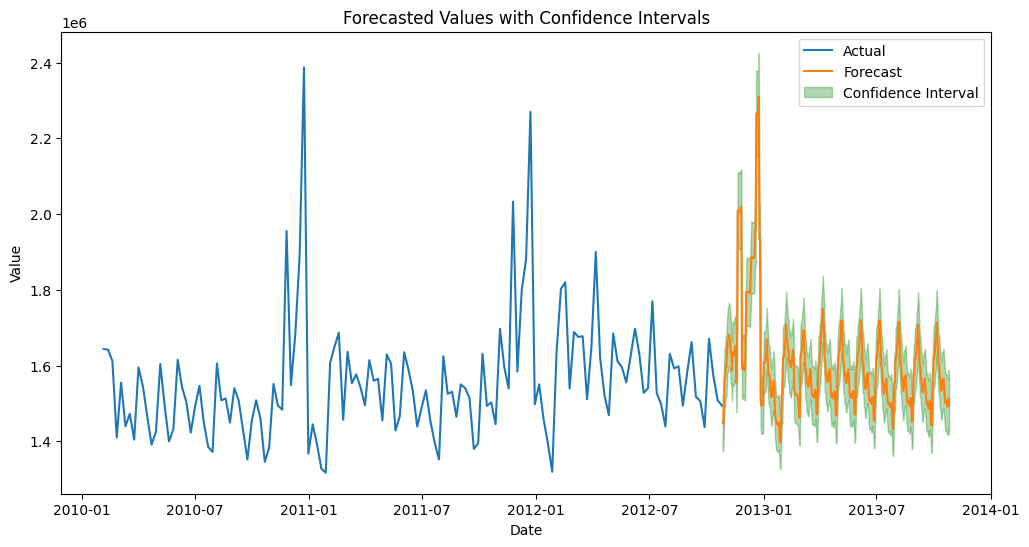

In [183]:
import matplotlib.pyplot as plt

#forecast_df = yhat['forecast_df']
forecast_df = forecast_df[forecast_df['item_id'] == 1].copy()
#forecast_df['date'] = pd.to_datetime(forecast_df['date'])

fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and future separately
for key, group in forecast_df.groupby('key'):
    label = 'Actual' if key == 'ACTUAL' else 'Forecast'
    color = 'tab:blue' if key == 'ACTUAL' else 'tab:orange'
    ax.plot(group['date'], group['value'], label=label, color=color)

# Plot confidence interval for forecast only
future = forecast_df[forecast_df['key'] == 'FUTURE']
if not future.empty and 'conf_lo' in future and 'conf_hi' in future:
    ax.fill_between(
        future['date'],
        future['conf_lo']*0.95,
        future['conf_hi']*1.05,
        color='green',
        alpha=0.3,
        label='Confidence Interval'
    )

ax.set_title('Forecasted Values with Confidence Intervals')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [ ]:
import pickle
from time_series_agent.utils import plot_forecast  # Commented out to avoid ModuleNotFoundError

result = pickle.load(open('result_forecast_agent.pkl', 'rb'))

forecast_df = pd.DataFrame(result['data_forecast'])
forecast_df
# plot_forecast(forecast_df, mode="dark", title="Forecast for Each Food Item for the Next 365 Days",line_width=1.0)  # Commented out to avoid error

# Save the result for later use
with open('result_forecast_agent.pkl', 'wb') as f:
    pickle.dump(result, f)  

result = pickle.load(open('result_forecast_agent.pkl','rb'))

ModuleNotFoundError: No module named 'time_series_agent'

In [68]:
df = pd.read_csv("Walmart.csv")
df = df.rename(columns={"Store": "item_id", "Weekly_Sales": "value", "Date": "date"})
df = df.drop(columns=["Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"])


In [110]:
df

,item_id,date,value
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68
...,...,...,...
6430,45,28-09-2012,713173.95
6431,45,05-10-2012,733455.07
6432,45,12-10-2012,734464.36
6433,45,19-10-2012,718125.53


In [71]:
def forecast_ts(data):
    import numpy as np
    import pandas as pd
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split

    # Convert input dictionary to DataFrame
    df = pd.DataFrame(data)

    # Identify columns for id, date, value
    # If multiple ID columns, consolidate into one
    id_cols = [col for col in df.columns if 'id' in col.lower()]
    if len(id_cols) == 0:
        # No ID column found, create one with constant value 1
        df['id'] = 1
        id_col = 'id'
    elif len(id_cols) == 1:
        id_col = id_cols[0]
    else:
        # More than one ID column, combine them into one string id
        df['id'] = df[id_cols].astype(str).agg('_'.join, axis=1)
        id_col = 'id'

    # Identify date column (assume the one with 'date' in name)
    date_cols = [col for col in df.columns if 'date' in col.lower()]
    if len(date_cols) == 0:
        raise ValueError("No date column found in data")
    date_col = date_cols[0]

    # Identify value column - assume numeric column not id or date, choose the one mostly non-null and numeric
    exclude_cols = set(id_cols + [date_col])
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    candidate_value_cols = [col for col in numeric_cols if col not in exclude_cols]
    if len(candidate_value_cols) == 0:
        raise ValueError("No suitable numeric value column found to forecast")
    # Pick the column with the largest sum of non-null values (most complete)
    value_col = max(candidate_value_cols, key=lambda c: df[c].notna().sum())

    # Convert date column to datetime
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
    if df[date_col].isnull().any():
        raise ValueError("Date column contains invalid date formats after conversion")

    # Sort dataframe by id and date
    df = df.sort_values([id_col, date_col])

    # Determine forecast horizon (h)
    # User asks for next 365 days
    forecast_horizon = 365

    # Helper function to extend a single time series frame by h periods (days)
    def extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h=365):
        "Extends a single time series by h daily periods."
        _filtered_df = data[data[id_col] == id_value].copy()
        _filtered_df[date_col] = pd.to_datetime(_filtered_df[date_col])
        _filtered_df = _filtered_df.set_index(date_col).sort_index()

        # Generate new dates daily starting from the day after last date
        last_date = _filtered_df.index[-1]
        new_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=h, freq='D')

        _ids = np.repeat(id_value, h)
        _vals = np.repeat(np.nan, h)

        new_df = pd.DataFrame({
            id_col: _ids,
            value_col: _vals
        }, index=new_dates)
        new_df['key'] = 'FUTURE'

        old_df = _filtered_df[[value_col]].copy()
        old_df[id_col] = id_value
        old_df['key'] = 'ACTUAL'

        ret_df = pd.concat([old_df, new_df], axis=0)
        return ret_df

    # Function to create time series features from datetime index
    def make_timeseries_features(data):
        "Makes time series features from a dataframe with a datetime index."
        data = data.copy()
        # Convert index to int64 seconds since epoch
        data['_index_num'] = data.index.astype(np.int64) // 10**9
        data['_year'] = data.index.year
        data['_month'] = data.index.month
        data['_day'] = data.index.day
        data['_wday'] = data.index.dayofweek
        data['_weekofyear'] = data.index.isocalendar().week.astype(int)
        return data

    # Forecast a single time series using XGBoost
    def forecast_single_timeseries(data, id_col, date_col, value_col, id_value, h=365, **kwargs):
        "Forecasts a single timeseries using XGBoost."
        single_ts_extended_df = extend_single_timeseries_frame(data, id_col, date_col, value_col, id_value, h)
        single_ts_feat_df = make_timeseries_features(single_ts_extended_df)

        future_df = single_ts_feat_df[single_ts_feat_df['key'] == 'FUTURE'].copy()
        actual_df = single_ts_feat_df[single_ts_feat_df['key'] == 'ACTUAL'].copy()

        # Prepare training data
        df_train = actual_df.drop([id_col, 'key'], axis=1)
        X = df_train.drop(value_col, axis=1)
        y = df_train[value_col]

        # Train/test split for conformal prediction error estimation
        # Use last h points as test set if enough points
        if len(X) > h:
            X_train, X_test = X.iloc[:-h], X.iloc[-h:]
            y_train, y_test = y.iloc[:-h], y.iloc[-h:]
        else:
            # If not enough data points, use all for training and no test
            X_train, y_train = X, y
            X_test, y_test = pd.DataFrame(columns=X.columns), pd.Series(dtype=float)

        model = XGBRegressor(**kwargs)
        model.fit(X_train, y_train)

        if len(X_test) > 0:
            y_pred = model.predict(X_test)
            std_dev = np.std(np.abs(y_test - y_pred))
        else:
            std_dev = 0

        # Refit on full actual data
        model.fit(X, y)

        # Predict future values
        future_X = future_df.drop([id_col, 'key', value_col], axis=1, errors='ignore')
        future_df[value_col] = model.predict(future_X)

        # Prediction intervals
        future_df['conf_lo'] = future_df[value_col] - 1.96 * std_dev
        future_df['conf_hi'] = future_df[value_col] + 1.96 * std_dev

        combined_df = pd.concat([actual_df, future_df], axis=0)

        return combined_df

    # Get unique item IDs
    unique_items = df[id_col].unique()

    forecast_dfs = []
    # Loop over each unique item and forecast
    for item in unique_items:
        forecast_df = forecast_single_timeseries(
            data=df,
            id_col=id_col,
            date_col=date_col,
            value_col=value_col,
            id_value=item,
            h=forecast_horizon,
            n_estimators=100,
            max_depth=3,
            random_state=42,
            verbosity=0,
        )
        forecast_dfs.append(forecast_df)

    combined_forecast_df = pd.concat(forecast_dfs, axis=0)

    # Drop engineered features
    drop_cols = [col for col in combined_forecast_df.columns if col.startswith('_')]
    combined_forecast_df = combined_forecast_df.drop(columns=drop_cols)

    # Reset index and bring datetime index back to column
    combined_forecast_df = combined_forecast_df.reset_index().rename(columns={'index': date_col})

    # Return combined forecast dataframe
    return {'forecast_df': combined_forecast_df}

In [86]:
yhat = forecast_ts(df)

In [89]:
yhat['forecast_df'].tail(100)

,date,value,item_id,key,conf_lo,conf_hi
22760,2013-07-19,694765.750,45,FUTURE,694765.750,694765.750
22761,2013-07-20,694765.750,45,FUTURE,694765.750,694765.750
22762,2013-07-21,704983.250,45,FUTURE,704983.250,704983.250
22763,2013-07-22,704983.250,45,FUTURE,704983.250,704983.250
22764,2013-07-23,694372.250,45,FUTURE,694372.250,694372.250
...,...,...,...,...,...,...
22855,2013-10-22,737874.250,45,FUTURE,737874.250,737874.250
22856,2013-10-23,734936.125,45,FUTURE,734936.125,734936.125
22857,2013-10-24,737596.625,45,FUTURE,737596.625,737596.625
22858,2013-10-25,749970.750,45,FUTURE,749970.750,749970.750


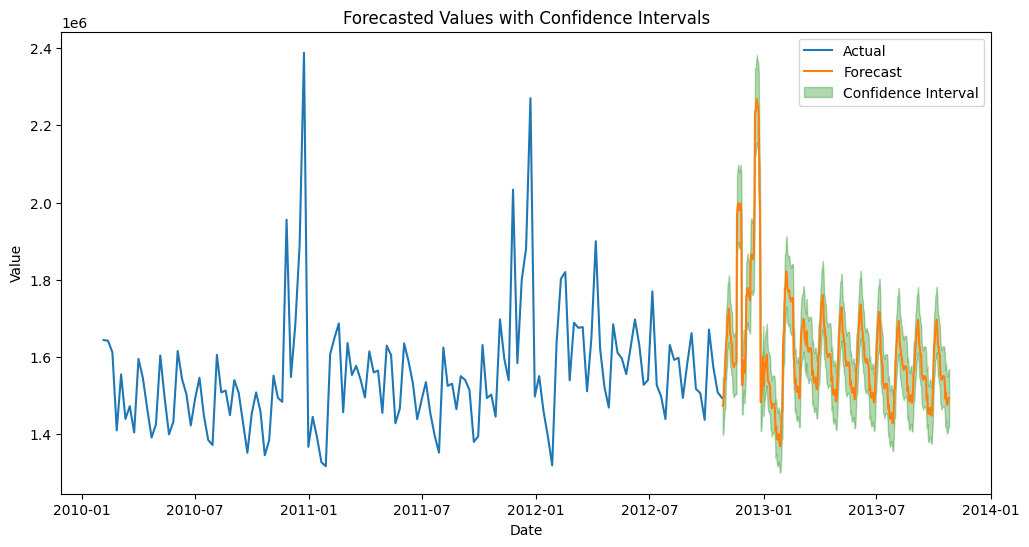

In [109]:
import matplotlib.pyplot as plt

forecast_df = yhat['forecast_df']
forecast_df = forecast_df[forecast_df['item_id'] == 1].copy()
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and future separately
for key, group in forecast_df.groupby('key'):
    label = 'Actual' if key == 'ACTUAL' else 'Forecast'
    color = 'tab:blue' if key == 'ACTUAL' else 'tab:orange'
    ax.plot(group['date'], group['value'], label=label, color=color)

# Plot confidence interval for forecast only
future = forecast_df[forecast_df['key'] == 'FUTURE']
if not future.empty and 'conf_lo' in future and 'conf_hi' in future:
    ax.fill_between(
        future['date'],
        future['conf_lo']*0.95,
        future['conf_hi']*1.05,
        color='green',
        alpha=0.3,
        label='Confidence Interval'
    )

ax.set_title('Forecasted Values with Confidence Intervals')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

In [93]:
future

,date,value,item_id,key,conf_lo,conf_hi
143,2012-10-27,1473508.750,1,FUTURE,1473508.750,1473508.750
144,2012-10-28,1473508.750,1,FUTURE,1473508.750,1473508.750
145,2012-10-29,1507074.750,1,FUTURE,1507074.750,1507074.750
146,2012-10-30,1539071.250,1,FUTURE,1539071.250,1539071.250
147,2012-10-31,1541442.000,1,FUTURE,1541442.000,1541442.000
...,...,...,...,...,...,...
503,2013-10-22,1480516.375,1,FUTURE,1480516.375,1480516.375
504,2013-10-23,1475353.875,1,FUTURE,1475353.875,1475353.875
505,2013-10-24,1482307.000,1,FUTURE,1482307.000,1482307.000
506,2013-10-25,1492636.000,1,FUTURE,1492636.000,1492636.000
